In [1]:
import numpy as np
from matplotlib import pyplot as plt

from warper import simulate_2d_only_memory, simulate_2d_only_memory_anharmonic_2

from multiprocessing import Pool

import os, pickle
from tqdm.notebook import tqdm

import pandas as pd

In [2]:
pool = Pool(4)

In [3]:
def get_RSH(A,B,g0,b,ka):
    o0 = np.sqrt(-A)
    mu = ka
    S = 1/g0/2/ka**2*(ka**2+o0**2+g0*ka+b**2)
    R = 1/g0/2/o0**2/ka**2 * (o0**2+ka**2)
    H = - 1/2/g0/ka**2*b
    return R,S,H, 2*(R*S+H**2)

def mean_with_err(arr, axis):
    return arr.mean(axis=axis), arr.std(axis=axis)/np.sqrt(arr.shape[axis])

In [4]:
# params - A,B,C,D,F,g0,b,ka

params = [
]

bs =  (0,1,2,3,4,5,6,8,10,12,14,16,18,20,22,24,26,28,30)
# bs =  (0,3,6,10)#,12,14,16,18,20,22,24,26,28,30)
params += [(-1,0,0,0,0,1,b,1) for b in bs]
params += [(2,0.14,0,0,0,1,b,1) for b in bs]
params += [(2,0.14,1,0.01,5,1,b,1) for b in bs]


df = pd.DataFrame(params, columns=["A","B","C","D","F","g0","b","ka"])

In [5]:
def f(row):
    return pd.Series(get_RSH(row.A, row.B, row.g0, row.b, row.ka),index=("R","S","H","varL"))
df = pd.concat([df, df.apply(f, axis=1)], axis=1, sort=False)

/home/ashot/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


In [6]:
df

,A,B,C,D,F,g0,b,ka,R,S,H,varL
0,-1,0.00,0,0.00,0,1,0,1,1.0,1.5,-0.0,3.0
1,-1,0.00,0,0.00,0,1,1,1,1.0,2.0,-0.5,4.5
2,-1,0.00,0,0.00,0,1,2,1,1.0,3.5,-1.0,9.0
3,-1,0.00,0,0.00,0,1,3,1,1.0,6.0,-1.5,16.5
4,-1,0.00,0,0.00,0,1,4,1,1.0,9.5,-2.0,27.0
5,-1,0.00,0,0.00,0,1,5,1,1.0,14.0,-2.5,40.5
6,-1,0.00,0,0.00,0,1,6,1,1.0,19.5,-3.0,57.0
7,-1,0.00,0,0.00,0,1,8,1,1.0,33.5,-4.0,99.0
8,-1,0.00,0,0.00,0,1,10,1,1.0,51.5,-5.0,153.0
9,-1,0.00,0,0.00,0,1,12,1,1.0,73.5,-6.0,219.0


In [7]:
N=50000000
warmup=0
dt=0.0001
samples=200
skip=5000
runs=4
time = np.linspace(0,N//skip *dt, N//skip)

dump_to_disk = False

In [8]:
(len(df) * N * runs * samples *4 // skip) * 4 / 1024**3

6.794929504394531

In [ ]:
results = []
for row in tqdm(df.itertuples(), total=len(df)):
#     if row.Index <40:
#         continue
    kwargs = dict(x0=np.zeros(samples),y0=np.zeros(samples),
                  vx0=np.zeros(samples),vy0=np.zeros(samples),
        N=N, samples=samples,
        dt=dt, warmup=warmup, skip=skip,
        A=row.A,B=row.B,C=row.C,D=row.D,F=row.F,
        gamma0=row.g0,b=row.b, kappa=row.ka)
    res = simulate_2d_only_memory_anharmonic_2(pool,runs,**kwargs)
    if dump_to_disk:
        np.save(f"results/{row.Index}", res)
    else:
        results.append(np.array(res[:4], dtype="float32"))

In [10]:
results = np.array(results)

### Load dumped data

In [ ]:
import os
n_files = len(os.listdir("results"))

In [ ]:
np.load("results/1.npy").shape

In [ ]:
results = np.zeros((n_files, 4, 800, 5000))

In [ ]:
for i in tqdm(range(n_files)):
    results[i] = np.load(f"results/{i}.npy")[:4,:,-5000:]

In [18]:
results[:,:,:,:].shape

(57, 4, 800, 10000)

### Start Analisys

In [11]:
cov = np.einsum("iakj,ibkj->ijab", results[:,:4,:,:],results[:,:4,:,:],optimize=True)/(results.shape[2]-1)

In [12]:
cov.shape

(57, 10000, 4, 4)

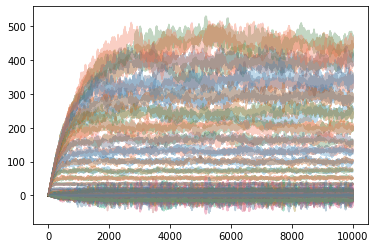

In [13]:
plt.plot(cov.transpose(1,0,2,3).reshape(-1,cov.shape[0]*16)[::], alpha=0.2);
# plt.plot(cov[5,:,1,2]);

In [27]:
stationari_treshold = 5000

In [28]:
results.shape

(57, 4, 800, 10000)

In [35]:
Rx,Ry, Sx, Sy = results[...,stationari_treshold::10].var(axis=2).transpose(1,0,2)
Lx = results[:,0] * results[:,3]
Ly = results[:,1] * results[:,2]

Hx = Lx.mean(axis=1)
Hy = Ly.mean(axis=1)

In [36]:
df["Rx"], df["Rx_err"]= mean_with_err(Rx,axis=-1)
df["Ry"], df["Ry_err"]= mean_with_err(Ry,axis=-1)
df["Sx"], df["Sx_err"]= mean_with_err(Sx,axis=-1)
df["Sy"], df["Sy_err"]= mean_with_err(Sy,axis=-1)
df["Hx"], df["Hx_err"]= mean_with_err(Hx,axis=-1)
df["Hy"], df["Hy_err"]= mean_with_err(Hy,axis=-1)

# df["Rx"], df["Rx_err"]= mean_with_err(Rx,axis=-1)


In [37]:
df[sorted(df.columns)].round(4)

,A,B,C,D,F,H,Hx,Hx_err,Hy,Hy_err,...,Ry_err,S,Sx,Sx_err,Sy,Sy_err,b,g0,ka,varL
0,-1,0.00,0,0.00,0,-0.0,0.0006,0.0004,-0.0004,0.0004,...,0.0023,1.5,1.496100,0.0033,1.501000,0.0035,0,1,1,3.0
1,-1,0.00,0,0.00,0,-0.5,-0.4960,0.0005,0.4961,0.0005,...,0.0022,2.0,1.990000,0.0046,1.992100,0.0045,1,1,1,4.5
2,-1,0.00,0,0.00,0,-1.0,-0.9987,0.0008,0.9988,0.0008,...,0.0023,3.5,3.489500,0.0078,3.486400,0.0083,2,1,1,9.0
3,-1,0.00,0,0.00,0,-1.5,-1.4944,0.0011,1.4943,0.0011,...,0.0022,6.0,5.969200,0.0137,5.971800,0.0139,3,1,1,16.5
4,-1,0.00,0,0.00,0,-2.0,-2.0090,0.0015,2.0092,0.0015,...,0.0023,9.5,9.547200,0.0215,9.567200,0.0198,4,1,1,27.0
5,-1,0.00,0,0.00,0,-2.5,-2.4962,0.0019,2.4962,0.0019,...,0.0022,14.0,14.007000,0.0301,14.016400,0.0318,5,1,1,40.5
6,-1,0.00,0,0.00,0,-3.0,-2.9980,0.0023,2.9709,0.0024,...,0.0023,19.5,19.157101,0.0432,19.408600,0.0432,6,1,1,57.0
7,-1,0.00,0,0.00,0,-4.0,-4.0105,0.0035,4.0107,0.0035,...,0.0022,33.5,33.822102,0.0846,33.903500,0.0833,8,1,1,99.0
8,-1,0.00,0,0.00,0,-5.0,-4.9440,0.0047,4.9438,0.0047,...,0.0023,51.5,51.843102,0.1183,51.777901,0.1184,10,1,1,153.0
9,-1,0.00,0,0.00,0,-6.0,-5.8857,0.0062,5.8841,0.0062,...,0.0023,73.5,73.572098,0.1615,73.547302,0.1626,12,1,1,219.0


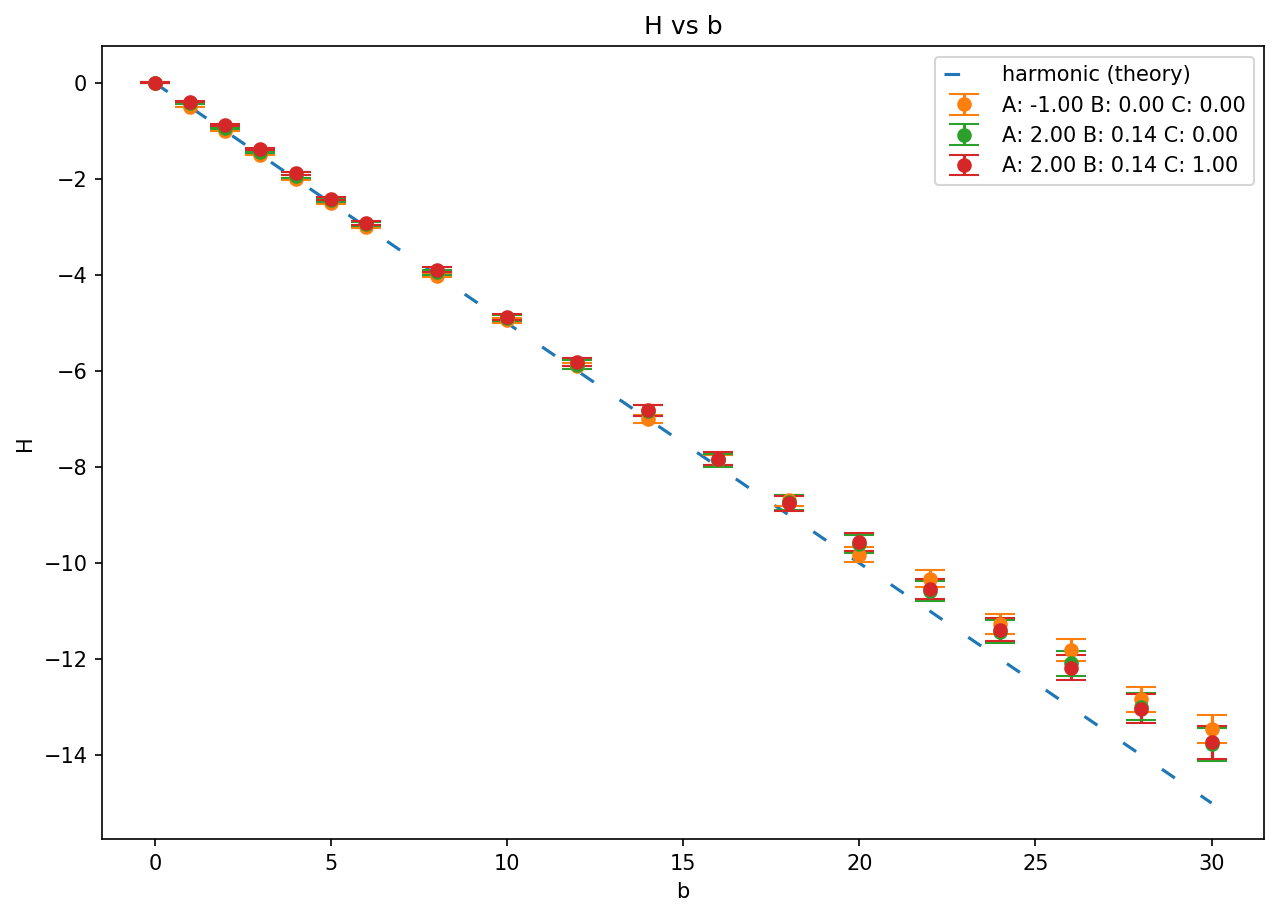

In [38]:
gb=df.groupby(["A","B","C","D","F"])

plt.figure(figsize=(10,7), dpi=150)
plt.title("H vs b")
plt.xlabel("b");plt.ylabel("H")
plt.plot(*zip(*[(b, get_RSH(-1, 0,1,b,1)[2]) for b in np.linspace(min(bs), max(bs))]),ls=(0, (5, 10)), label="harmonic (theory)")
for key in gb.groups:
    gp = gb.get_group(key)
#     plt.plot(gp.b, gp.Hx)
    plt.errorbar(gp.b, gp.Hx, yerr=gp.Hx_err*10, capsize=7, marker="o", ls="none", 
                 label=f"A: {gp.A.mean():0.2f} B: {gp.B.mean():0.2f} C: {gp.C.mean():0.2f}")
# plt.xlim(-1,5)
# plt.ylim(-4,1)
plt.legend()

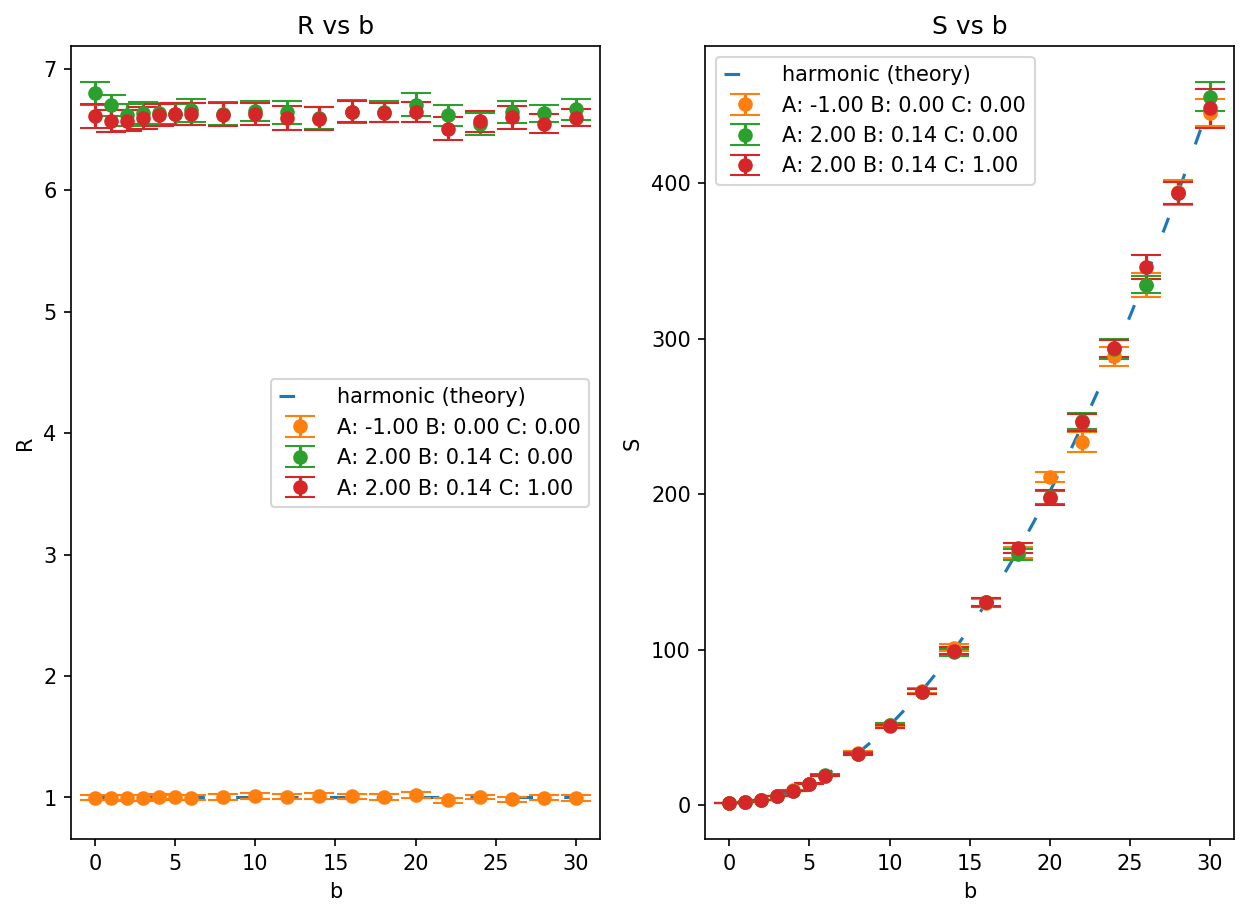

In [39]:
gb=df.groupby(["A","B","C","D","F"])

plt.figure(figsize=(10,7), dpi=150)
plt.subplot(121)
plt.title("R vs b")
plt.xlabel("b");plt.ylabel("R")
plt.plot(*zip(*[(b, get_RSH(-1, 0,1,b,1)[0]) for b in np.linspace(min(bs), max(bs))]),ls=(0, (5, 10)), label="harmonic (theory)")
for key in gb.groups:
    gp = gb.get_group(key)
#     plt.plot(gp.b, gp.Hx)
    plt.errorbar(gp.b, gp.Rx, yerr=gp.Rx_err*10, capsize=7, marker="o", ls="none", 
                label=f"A: {gp.A.mean():0.2f} B: {gp.B.mean():0.2f} C: {gp.C.mean():0.2f}")
plt.legend()

plt.subplot(122)
plt.title("S vs b")
plt.xlabel("b");plt.ylabel("S")
plt.plot(*zip(*[(b, get_RSH(-1, 0,1,b,1)[1]) for b in np.linspace(min(bs), max(bs))]),ls=(0, (5, 10)), label="harmonic (theory)")
for key in gb.groups:
    gp = gb.get_group(key)
#     plt.plot(gp.b, gp.Hx)
    plt.errorbar(gp.b, gp.Sx, yerr=gp.Sx_err*10, capsize=7, marker="o", ls="none", 
                label=f"A: {gp.A.mean():0.2f} B: {gp.B.mean():0.2f} C: {gp.C.mean():0.2f}")
plt.legend()

In [ ]:
gb.groups

In [ ]:
dir(gb)

In [ ]:
R_sample = results.var(axis=2)[:,0] 
S_sample = results.var(axis=2)[:,2]

In [ ]:
L = (results[:,0] * results[:,3] - results[:,1] * results[:,2])
H_sample = L.mean(axis=1)/2

In [ ]:
H_sample.shape

In [ ]:
H_sample[:,-3000:].mean(axis=1)

In [ ]:
np.sqrt(H_sample[:,-3000:].var(axis=1)/3000)

In [ ]:
H

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.scatter(S, S_sample[..., -1])
plt.subplot(132)
plt.scatter(R, R_sample[..., -1])
plt.subplot(133)
plt.scatter(H, H_sample[..., -1])

In [ ]:
results.shape

In [ ]:
L.shape

In [ ]:
# T = results[:,2,:,:]
T = L/2
hlines = H

In [ ]:
T.shape[0]

In [ ]:
fig, axs = plt.subplots(1+T.shape[0]//2,2,figsize=(14,8),dpi=120)
for ax, xi,h in zip(axs.flatten(),T[:,:,:], hlines):
    ax.plot(time, xi.mean(axis=0))
    ax.hlines(y=h, xmin=0, xmax=max(time), colors="r")
# plt.show()

In [ ]:
L.shape

In [ ]:
plt.hist(L[0,:,-1], bins=100);

In [ ]:
L[1,:,-1].mean()

In [ ]:
sorted(L[1,:,-1])[1600]

In [ ]:
L.shape

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(L[1,2,3000:])